
## Rasa NLU & Rasa Core - Building Chatbots



In [27]:
from IPython.display import Image

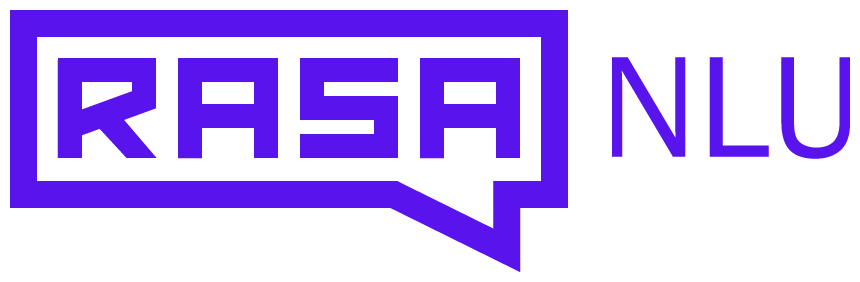

In [28]:
Image("rasa_logo.png")

### Rasa NLU & Rasa Core Tutorials
+ Tabula rasa - blank slate
+ Natural Language Understanding tool for understanding what is being said in short pieces of text
+ 
#### Main Idea
+ Intent Classification ===> rasa_nlu
+ Entity Extraction ===> rasa_nlu
+ Dialogue and Actions ===> rasa_core

#### Installing
- pip install tzlocal==1.5.1
- pip install rasa_core

#### Adding Backend for NLU
- pip install rasa_nlu[spacy]

+ install a language model for the language you need
- python -m spacy download en_core_web_md
- python -m spacy link en_core_web_md en


#### Easy way Run on Google Colab 
- Python 3.6 and up

# Outline
Installation
Writing Stories
Defining a Domain
Training your Dialogue Model
Starting up the bot
Talking to the bot (no NLU)
Part 2: Add natural language understanding
Installing NLU
Language Understanding
Train the Rasa NLU Model
Starting up the bot (with NLU)
Talking to the Bot (with NLU)
Pro Tip: Visualising the Training Data

In [3]:
import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

#### Writing A Story


### Story Structure
  - starts stories ==> ##
  -  intent/entities of the message you are sending ==> *
  -  actions that the bot will do or take eg utter_greet,utter_location,API_function 
      with dash  -

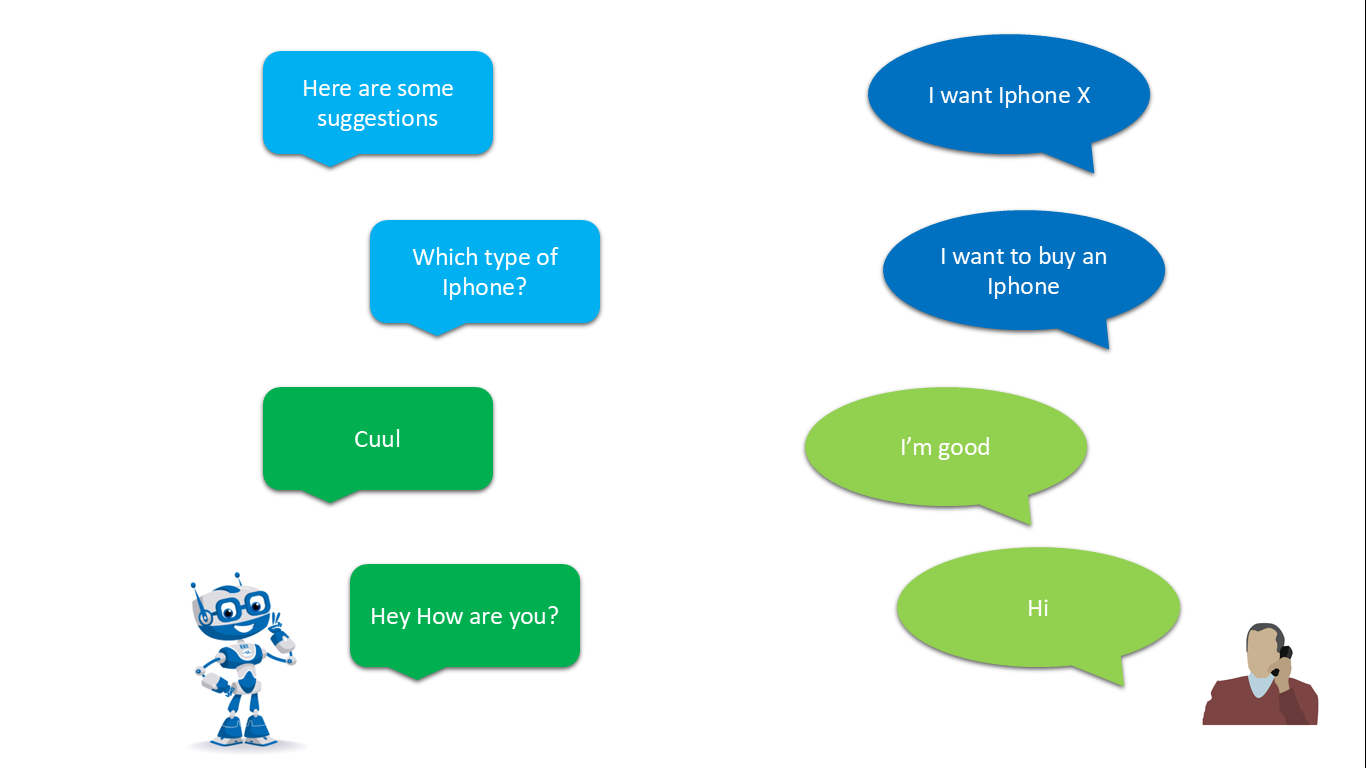

In [29]:
Image('sample_chatbot.png')

In [5]:
stories_md = """
## happy path               <!-- name of the story - just for debugging -->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_goodbye
  
  
## sad path 1               <!-- this is already the start of the next story -->
* greet
  - utter_greet             <!-- action the bot should execute -->
* mood_unhappy
  - utter_cheer_up
  - utter_did_that_help
* mood_affirm
  - utter_happy

## good purchase path               <!-- name of the story - for making purchase-->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* purchase                  <! -- user intention to purchase things --->
  - utter_purchase  
* purchase_affirm           <!-- user utterance, in format intent[entities] -->
  - utter_purchase
* purchase_affirm
  - utter_price
* mood_affirm
  - utter_goodbye
  
## good purchase path2
* greet              
  - utter_greet
* inform                    <!-- user utterance, in format intent[entities] -->
  - utter_ask_item
  - utter_show_item
  - utter_did_that_help
* goodbye
    - utter_goodbye

## no purchase path               <!-- name of the story - for making purchase-->
* greet              
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* mood_affirm
  - utter_happy
* purchase                  <! -- user intention to purchase things --->
  - utter_purchase  
* purchase_deny           <!-- user utterance, in format intent[entities] -->
  - utter_purchase
* purchase_deny
  - utter_ask_item
* mood_affirm
  - utter_goodbye
  
  
## get weather of location
* greet
  - utter_greet
* mood_great               <!-- user utterance, in format intent[entities] -->
  - utter_happy
* inform
  - utter_ask_location
* inform{"location": "Paris"}
  - utter_ask_location
* goodbye
    - utter_goodbye
    - export
    
## get weather of location
* greet
    - utter_greet
* inform[location=London]
    - utter_ask_location
* goodbye
    - utter_goodbye
    - export
  
  
## strange user
* mood_affirm
  - utter_happy
* mood_affirm
  - utter_unclear

## say goodbye
* goodbye
  - utter_goodbye

"""

%store stories_md > my_stories.md

Writing 'stories_md' (str) to file 'my_stories.md'.


### Defining the Domain Universe/Environment
+ Where(universe or environment) your bot lives
 - - intents : what you expect users to say,their intentions
 - - action : what your bot is supposed to do(list them eg utter_greet,custom actions)
 - - template :

+ Stories

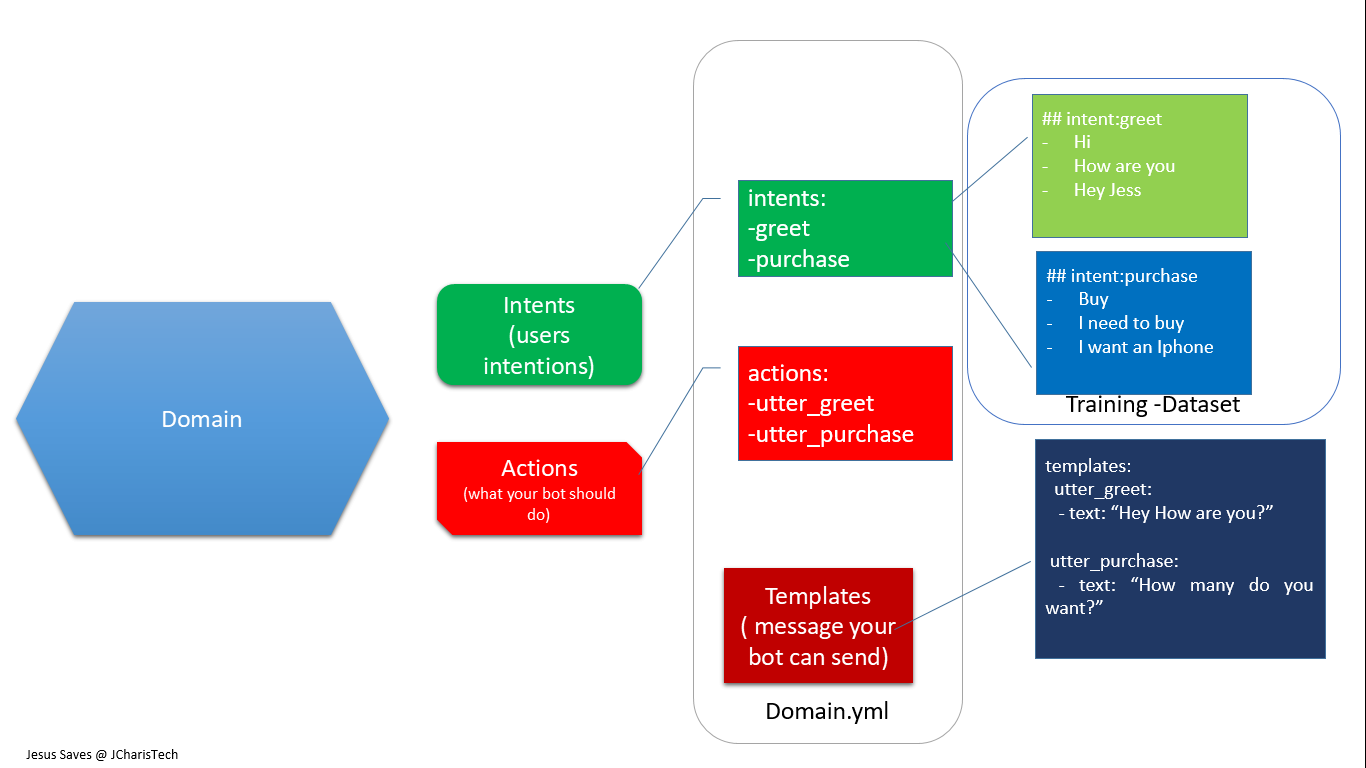

In [6]:
Image('summaryofdomain_rasa_nlu.png')

In [7]:
domain_yml = """
intents:
  - greet
  - goodbye
  - mood_affirm
  - mood_deny
  - mood_great
  - mood_unhappy
  - purchase
  - purchase_affirm
  - purchase_deny
  - inform
  - weather
  
entities:
 - location
 - money
 
slots:
 location:
   type: text


actions:
- utter_greet
- utter_cheer_up
- utter_purchase
- utter_price
- utter_did_that_help
- utter_ask_item
- utter_show_item
- utter_happy
- utter_goodbye
- utter_unclear
- utter_ask_location

templates:
  utter_greet:
  - text: "Hey! How are you?"
  - text: "Hi How are you?"
  - text: "What's up"
  - text: "Bonjour"

  utter_cheer_up:
  - text: "Stay motivated,all is well"
  - text: "Here is something to make you happy"
  - text: "Here is something to cheer you up:"
    image: "https://i.imgur.com/nGF1K8f.jpg"

  utter_did_that_help:
  - text: "Did that help you?"

  utter_unclear:
  - text: "I am not sure what you are aiming for."
  - text: "How do you mean? Can you clarify "
  - text: "Not quite sure what you want. "
  
  utter_happy:
  - text: "Great carry on!" 
  
  utter_purchase:
  - text: 'What item do you want to buy?'
  - text: 'Here are some recommended products'
  - text: 'You want to buy this?'
  - text: 'We only have this?'
  - text: 'Can you give me the specs ?'
  
  utter_ask_item:
  - text: 'What item do you want to buy?'
  - text: 'How many do you want to buy?'
  - text: 'Which type?'

  utter_show_item:
  - text: "Here are some suggestions."
  - text: "Check this one out."
  - text: "We only have this product"
  - text: "Sending sample picture"
    
  utter_price:
  - text: "It will cost you this much"
  - text: "The price is 100"
  - text: "You will pay"
  - text: "Here is the bill"
  - text: "The total cost is 2000, you can pay with your credit card."

  utter_ask_location:
  - text:'In what location?'
  - text:'In which place?'
  - text:'Where precisely?'

  utter_goodbye:
  - text: "Bye"
  - text: "Talk to you later"
  - text: "Cu"
  - text: "Aurevoir"
  - text: "A bientot "
  - text: "goodbye"
  - text: "have a nice day"
  - text: "see you around"
  - text: "bye bye"
  - text: "See you later"
  
"""

%store domain_yml > my_domain.yml

Writing 'domain_yml' (str) to file 'my_domain.yml'.


#### Training your Dialogue Model
+ rasa_core
+ Using Keras
+ Install keras + tensorflow backend

In [8]:
# Load the packages without using fallbackpolicy
from rasa_core.policies.keras_policy import KerasPolicy
from rasa_core.agent import Agent

INFO:apscheduler.scheduler:Scheduler started


In [9]:
# Set the Agent
agent = Agent('my_domain.yml', policies=[KerasPolicy()])

In [10]:
# loading our neatly defined training dialogues
training_data = agent.load_data('my_stories.md')
agent.train(
        training_data
)

Processed Story Blocks: 100%|████████████████████████████████████████████| 9/9 [00:00<00:00, 101.16it/s, # trackers=12]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 5, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 18)                594       
_________________________________________________________________
activation (Activation)      (None, 18)                0         
Total params: 8,914
Trainable params: 8,914
Non-trainable params: 0
_________________________________________________________________


INFO:rasa_core.policies.keras_policy:Fitting model with 249 total samples and a validation split of 0.1


Epoch 1/100
249/249 [==============================] - ETA: 8s - loss: 2.9102 - acc: 0.062 - 1s 5ms/step - loss: 2.8579 - acc: 0.1044
Epoch 2/100
249/249 [==============================] - ETA: 0s - loss: 2.7811 - acc: 0.375 - 0s 216us/step - loss: 2.7454 - acc: 0.3735
Epoch 3/100
249/249 [==============================] - ETA: 0s - loss: 2.6940 - acc: 0.406 - 0s 138us/step - loss: 2.6430 - acc: 0.4378
Epoch 4/100
249/249 [==============================] - ETA: 0s - loss: 2.5981 - acc: 0.406 - 0s 151us/step - loss: 2.5005 - acc: 0.4418
Epoch 5/100
249/249 [==============================] - ETA: 0s - loss: 2.4684 - acc: 0.406 - 0s 161us/step - loss: 2.3408 - acc: 0.4418
Epoch 6/100
249/249 [==============================] - ETA: 0s - loss: 2.3462 - acc: 0.406 - 0s 151us/step - loss: 2.2006 - acc: 0.4418
Epoch 7/100
249/249 [==============================] - ETA: 0s - loss: 2.3080 - acc: 0.406 - 0s 137us/step - loss: 2.1278 - acc: 0.4418
Epoch 8/100
249/249 [=============================

Epoch 61/100
249/249 [==============================] - ETA: 0s - loss: 0.6610 - acc: 0.812 - 0s 169us/step - loss: 0.6230 - acc: 0.8635
Epoch 62/100
249/249 [==============================] - ETA: 0s - loss: 0.7202 - acc: 0.781 - 0s 181us/step - loss: 0.6335 - acc: 0.8394
Epoch 63/100
249/249 [==============================] - ETA: 0s - loss: 0.7589 - acc: 0.718 - 0s 162us/step - loss: 0.6554 - acc: 0.8353
Epoch 64/100
249/249 [==============================] - ETA: 0s - loss: 0.6640 - acc: 0.843 - 0s 152us/step - loss: 0.6059 - acc: 0.8635
Epoch 65/100
249/249 [==============================] - ETA: 0s - loss: 0.5693 - acc: 0.875 - 0s 161us/step - loss: 0.5936 - acc: 0.8474
Epoch 66/100
249/249 [==============================] - ETA: 0s - loss: 0.6430 - acc: 0.750 - 0s 144us/step - loss: 0.5899 - acc: 0.8394
Epoch 67/100
249/249 [==============================] - ETA: 0s - loss: 0.6523 - acc: 0.781 - 0s 165us/step - loss: 0.5757 - acc: 0.8554
Epoch 68/100
249/249 [===================

INFO:rasa_core.policies.keras_policy:Done fitting keras policy model


In [11]:
# Saving Our Dialogue Models
agent.persist('models/dialogue')

INFO:rasa_core.agent:Model directory models/dialogue exists and contains old model files. All files will be overwritten.
INFO:rasa_core.agent:Persisted model to 'D:\models\dialogue'


#### Starting up the bot
+ rasa_core
+ agent
+ dialogue model

In [12]:
# Load Dialogue model into agent
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue')

# With NLU Trained data
# agent = Agent.load('models/dialogue', interpreter=model_directory)

#### Practising or Talking to the bot

In [13]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_message(a)
    for response in responses:
        print("BOT :" + response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
Hi


BOT :Great carry on!
How are you?


BOT :Talk to you later
I want to buy an Iphone


BOT :See you later
I need a phone


BOT :Great carry on!
tell me something else


BOT :You want to buy this?
yes


BOT :Can you give me the specs ?
yes


BOT :goodbye
stop


## Training Our Bot with Rasa NLU

### Natural Language Understanding and Intent Classification

In [23]:
# Loading our Packages
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

#### How our dataset can look like
+ Describes what the messages mean/intention
+ json
+ md
+ yml




In [15]:
# Data Set
nludataset_md = """
## intent:greet
- hey
- hello
- hi
- hello there
- good morning
- good evening
- moin
- hey there
- let's go
- hey dude
- goodmorning
- goodevening
- good afternoon

## intent:goodbye
- cu
- good by
- cee you later
- good night
- good afternoon
- bye
- goodbye
- have a nice day
- see you around
- bye bye
- see you later

## intent:mood_affirm
- yes
- indeed
- of course
- that sounds good
- correct

## intent:mood_deny
- no
- never
- I don't think so
- don't like that
- no way
- not really

## intent:mood_great
- perfect
- very good
- great
- amazing
- feeling like a king
- wonderful
- I am feeling very good
- I am great
- I am amazing
- I am going to save the world
- super
- extremely good
- so so perfect
- so good
- so perfect

## intent:mood_unhappy
- my day was horrible
- I am sad
- I don't feel very well
- I am disappointed
- super sad
- I'm so sad
- sad
- very sad
- unhappy
- bad
- very bad
- awful
- terrible
- not so good
- not very good
- extremly sad
- so saad
- so sad

## intent:purchase
- I need to buy IPhone
- I want to purchase some items
- What product is that?
- You need this watch.
- How much that it cost?
- He bought this house for $2000
- She is selling it
- I need to buy another
- Can you make a request for the product
- How much?
- This is so expensive
- It was very cheap
- He is buying 
- You ordered for this
- buy
- sell
- pay
- purchase
- what is the price
- Tell me the price
- Show me the product

## intent:purchase_affirm
- yes
- yes I need to buy it
- indeed I want to buy
- of course
- that sounds good
- correct
- I will take it

## intent:purchase_deny
- no I don't want it
- never
- I don't think so
- don't like that
- no way 
- not really
- no


## intent:inform
- I need to buy IPhone
- I want to purchase some items
- What product is that?

## intent:weather
- I wonder what is the weather in Vilnius right now?
- what is the weather?
- Tell me the weather
- Is the weather nice in Barcelona today
- I am going to London today and I wonder what is the weather out there?
- Show me the weather in Dublin, please
- Tell me the weather in Vilnius

"""

%store nludataset_md > nludataset.md

Writing 'nludataset_md' (str) to file 'nludataset.md'.


In [16]:
# Loading Dataset
# Dataset can be in json or md
training_data = load_data('nludataset.md')


INFO:rasa_nlu.training_data.loading:Training data format of nludataset.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 113 (11 distinct intents)
	- Found intents: 'purchase_deny', 'purchase', 'mood_deny', 'weather', 'greet', 'mood_great', 'mood_unhappy', 'mood_affirm', 'purchase_affirm', 'inform', 'goodbye'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



In [17]:
#!pip install graphviz libgraphviz-dev pkg-config && pip install pygraphviz;
!pip install rasa_nlu[spacy];
!python -m spacy download en;

You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



    Compatibility error
    No compatible model found for 'en;' (spaCy v2.0.18).



#### Configuration File
spacy as backend

mitie as backend

In [18]:
# Load the Rasa_nlu Packages
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer


#### Load and Configure our Backend with spaCy

In [19]:
training_data = load_data('nludataset.md')
pipeline = [{"name": "nlp_spacy"}, 
            {"name": "tokenizer_spacy"}, 
            {"name": "intent_featurizer_spacy"},  
            {"name": "intent_classifier_sklearn"}]


INFO:rasa_nlu.training_data.loading:Training data format of nludataset.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 113 (11 distinct intents)
	- Found intents: 'purchase_deny', 'purchase', 'mood_deny', 'weather', 'greet', 'mood_great', 'mood_unhappy', 'mood_affirm', 'purchase_affirm', 'inform', 'goodbye'
	- entity examples: 0 (0 distinct entities)
	- found entities: 



In [20]:
trainer = Trainer(RasaNLUModelConfig({"pipeline": pipeline}))
interpreter = trainer.train(training_data)
model_directory = trainer.persist('./projects/default/')

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_featurizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component intent_classifier_sklearn


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into 'D:\projects\default\default\model_20190413-162819'


In [21]:
from rasa_core.agent import Agent
agent = Agent.load('models/dialogue', interpreter=model_directory)

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.


 #### Lets Chat

In [26]:
print("Your bot is ready to talk! Type your messages here or send 'stop'")
while True:
    a = input()
    if a == 'stop':
        break
    responses = agent.handle_text(a)
    for response in responses:
        print("BOT: " + response["text"])

Your bot is ready to talk! Type your messages here or send 'stop'
Hi
BOT: Bonjour
I need a phone
BOT: text:'In what location?'
India
BOT: see you around
I want to buy an Iphone
BOT: Hi How are you?
Good
BOT: Great carry on!
What's the weather?
BOT: Great carry on!
Hey
BOT: Hi How are you?
Sad
BOT: Stay motivated,all is well
BOT: Did that help you?
Yes
BOT: Great carry on!
stop
